<a href="https://colab.research.google.com/github/developer-AJabbar/Frequent_Item_Rule_App/blob/main/Fraud_XGB_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [ ]:
df = pd.read_csv("/content/Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


   step  type    amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0     1     3   9839.64    125164       170136.0       160296.36    274917   
1     1     3   1864.28    361319        21249.0        19384.72    286716   
2     1     4    181.00    165236          181.0            0.00     73550   
3     1     1    181.00    961662          181.0            0.00     65464   
4     1     3  11668.14    567915        41554.0        29885.86    138001   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0             0.0             0.0        0               0  
1             0.0             0.0        0               0  
2             0.0             0.0        1               0  
3         21182.0             0.0        1               0  
4             0.0             0.0        0               0  


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:19:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔍 Evaluation Metrics
Accuracy      : 0.9991
F1 Score      : 0.8253
Precision     : 0.7812
Recall        : 0.8746
ROC AUC       : 0.9939
Log Loss      : 0.0032


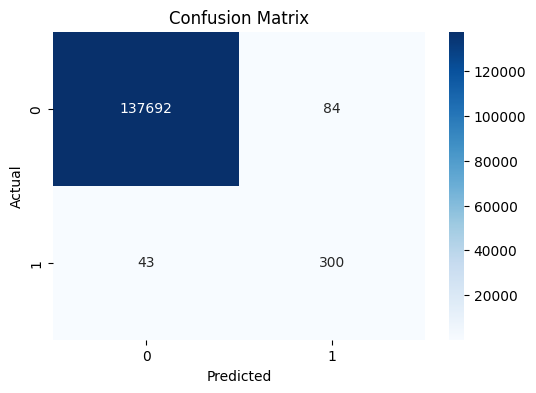

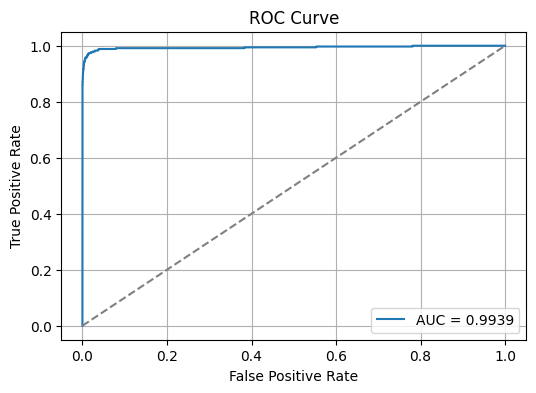

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, log_loss, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# === Step 1: Load & Preprocess ===
df = pd.read_csv("/content/Fraud.csv")

# Keep only TRANSFER and CASH_OUT (fraud only happens in these)
df = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]

# Encode transaction type (TRANSFER = 0, CASH_OUT = 1)
df['type'] = LabelEncoder().fit_transform(df['type'])

# Drop non-numeric and unnecessary columns
df = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

# Separate features and label
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# === Step 2: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# === Step 3: Train XGBoost Model ===
# Handle class imbalance using scale_pos_weight
scale = (len(y_train) - sum(y_train)) / sum(y_train)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale)
model.fit(X_train, y_train)

# === Step 4: Predictions ===
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# === Step 5: Evaluation Metrics ===
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)
logloss = log_loss(y_test, y_pred_prob)

print("🔍 Evaluation Metrics")
print(f"Accuracy      : {accuracy:.4f}")
print(f"F1 Score      : {f1:.4f}")
print(f"Precision     : {precision:.4f}")
print(f"Recall        : {recall:.4f}")
print(f"ROC AUC       : {auc:.4f}")
print(f"Log Loss      : {logloss:.4f}")

# === Step 6: Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# === Step 7: ROC Curve (Optional) ===
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


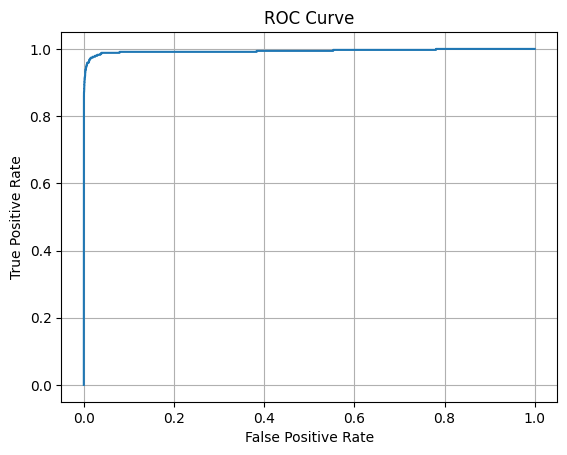

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid()
plt.show()


Confusion Matrix:


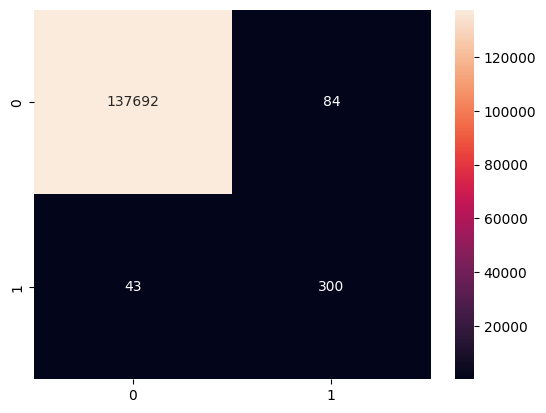


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    137776
           1       0.78      0.87      0.83       343

    accuracy                           1.00    138119
   macro avg       0.89      0.94      0.91    138119
weighted avg       1.00      1.00      1.00    138119

ROC AUC Score: 0.99388600688048


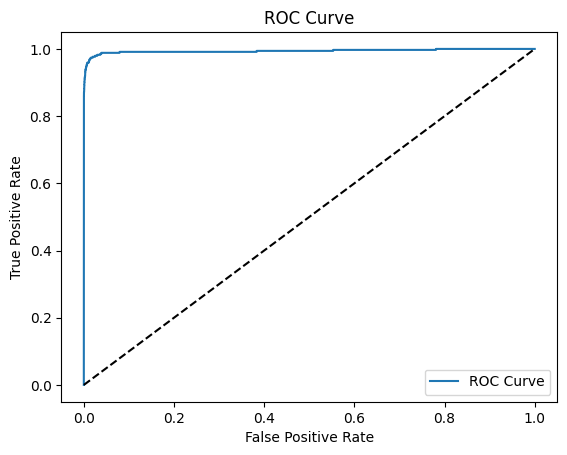

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# y_test: actual labels  # Changed y_true to y_test
# y_pred: predicted labels
# y_prob: predicted probabilities (for ROC)

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d') # Changed y_true to y_test
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred)) # Changed y_true to y_test

roc_score = roc_auc_score(y_test, y_prob) # Changed y_true to y_test
print("ROC AUC Score:", roc_score)

fpr, tpr, _ = roc_curve(y_test, y_prob) # Changed y_true to y_test
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

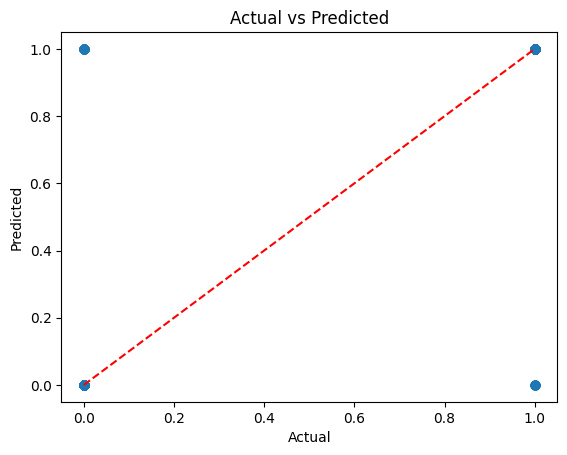

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.show()


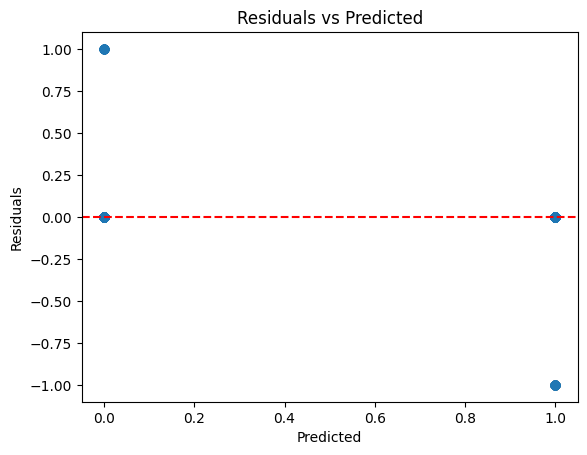

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()
